<a href="https://colab.research.google.com/github/KodumuruRaja/Performance-Metrics/blob/main/Performance-Metrics-(All%20techniques%20for%20Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data=pd.read_csv("/content/Student_Grades_Data.csv")
data.head()

,Time_to_Study,Grades
0,1,1.5
1,5,2.7
2,7,3.1
3,3,2.1
4,2,1.8


In [ ]:
data.shape

(50, 2)

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [ ]:
X

array([[ 1],
       [ 5],
       [ 7],
       [ 3],
       [ 2],
       [ 9],
       [ 6],
       [12],
       [11],
       [ 2],
       [ 4],
       [ 8],
       [13],
       [ 9],
       [14],
       [10],
       [ 6],
       [12],
       [ 1],
       [ 4],
       [14],
       [10],
       [11],
       [ 4],
       [ 5],
       [ 8],
       [ 1],
       [ 2],
       [ 3],
       [ 7],
       [ 8],
       [14],
       [ 7],
       [ 8],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [ 8],
       [ 2]])

In [ ]:
y

array([1.5, 2.7, 3.1, 2.1, 1.8, 3.9, 2.9, 4.5, 4.3, 1.8, 2.4, 3.5, 4.8,
       3.9, 5. , 4.1, 2.9, 4.5, 1.5, 2.4, 5. , 4.1, 4.3, 2.4, 2.7, 3.5,
       1.5, 1.8, 2.1, 3.1, 3.5, 5. , 3.1, 3.5, 1.5, 1.8, 2.1, 2.4, 2.7,
       2.9, 3.1, 3.5, 3.9, 4.1, 4.3, 4.5, 4.8, 5. , 3.5, 1.8])

In [ ]:
#Split the data into training and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
y_test

array([2.1, 3.5, 2.4, 3.5, 3.1, 1.8, 2.7, 5. , 4.3, 1.8, 3.5, 1.8, 1.5,
       1.5, 1.5])

In [ ]:
#Fit the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Print the 
print(f'a0 = {LinReg.intercept_}')
print(f'a1 = {LinReg.coef_}')

a0 = 1.3045041899441352
a1 = [0.2704027]


In [ ]:
#Predicted grade scores from test dataset
y_predict = LinReg.predict(X_test)
y_predict

array([2.11571229, 3.46772579, 2.38611499, 3.46772579, 3.19732309,
       1.84530959, 2.65651769, 5.09014199, 4.27893389, 1.84530959,
       3.46772579, 1.84530959, 1.57490689, 1.57490689, 1.57490689])

In [ ]:
#Actual grade scores from test dataset
y_test

array([2.1, 3.5, 2.4, 3.5, 3.1, 1.8, 2.7, 5. , 4.3, 1.8, 3.5, 1.8, 1.5,
       1.5, 1.5])

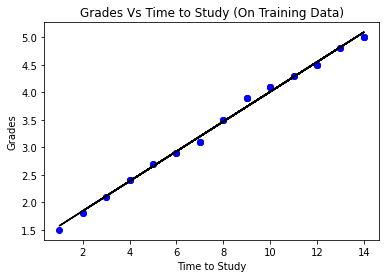

In [ ]:
#Grades Vs Time to Study visualization on Training Data
plt.scatter(X_train, y_train, color='Blue')
plt.plot(X_train, LinReg.predict(X_train), color='Black')
plt.title('Grades Vs Time to Study (On Training Data)')
plt.xlabel('Time to Study')
plt.ylabel('Grades')
plt.show()

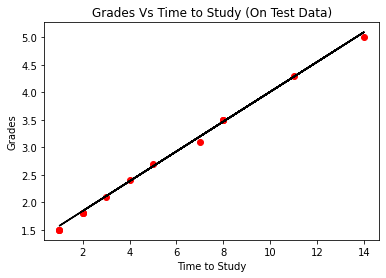

In [ ]:
#Grades Vs Time to Study visualization on Test Data
plt.scatter(X_test, y_test, color='Red')
plt.plot(X_train, LinReg.predict(X_train), color='Black')
plt.title('Grades Vs Time to Study (On Test Data)')
plt.xlabel('Time to Study')
plt.ylabel('Grades')
plt.show()

# **1) Mean Squared Error**
# MSE=1 depicts the Worst Model
# MSE=0 depicts the Best Model
# MSE can over estimate the Model's badness in case of Noisy Data
# It is Sensitive to Outliers
# If there are no Outliers in our data you can use MSE

In [ ]:
#Model Evaluation using Mean Square Error (MSE)
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:',mean_squared_error(y_test, y_predict))

Mean Squared Error: 0.003099226779173019


# **2) Root Mean Square Error**
# RMSE=1 depicts Worst Model
# RMSE=0 depicts Best Model

In [ ]:
#Model Evaluation using Root Mean Square Error (RMSE)
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Root Mean Squared Error: 0.055670699467251346


# **3) Mean Absolute Error**
# It is not sensitive to Outliers
# When Outliers are present in your data you can use MAE

In [ ]:
#Model Evaluation using Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test, y_predict))

Mean Absolute Error: 0.04927219118559932


# **4) R Squared Error**

In [ ]:
#Model Evaluation using R-Square
from sklearn.metrics import r2_score
r_square =r2_score(y_test, y_predict)
print('R-Square Error:', r_square)

R-Square Error: 0.997283498148368


# **5) Adjusted R Square**

In [ ]:
#For Illustration Purpose Only. 
#Considering Multiple Linear Equation with two Variables : grade = a0 + a1*time_to_study + a2*class_participation
#Model Evaluation using Adjusted R-Square. 
# Here n = no. of observations and p = no. of independent variables

n = 50
p = 2
Adj_r_square = 1-(1-r_square)*(n-1)/(n-p-1)
print('Adjusted R-Square Error:', Adj_r_square)

Adjusted R-Square Error: 0.9971679023248944
